In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df = pd.read_csv(r'C:\Users\choco\OneDrive\Desktop\python\Airbnb NYC 2019.csv')
df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


In [6]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
df['reviews_per_month']=df['reviews_per_month'].replace(np.nan,0)

In [8]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
df.dropna(inplace=True)
df.isnull().sum().sum()

np.int64(0)

In [10]:
#removing outplayers
def remove_outliers(df,col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    x=df[col][~((df[col]<lower_bound)|(df[col]>upper_bound))]
    return x

Text(0.5, 1.0, 'price')

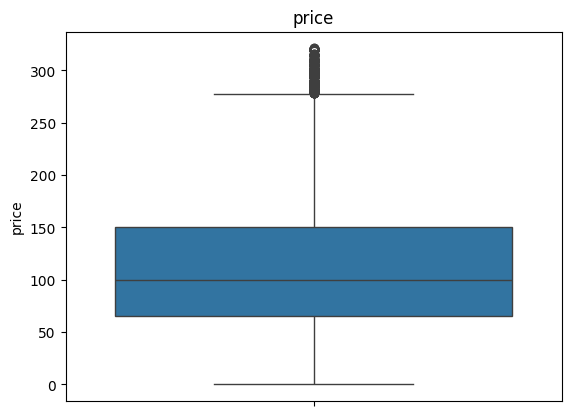

In [11]:
df_cleaned=remove_outliers(df,'price')
sns.boxplot(df_cleaned)
plt.title('price')

In [12]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [13]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [14]:
#top neighbourhood by listing and property

In [15]:
top_neighbourhood=df['neighbourhood'].value_counts()[:10].reset_index()
top_neighbourhood

,neighbourhood,count
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
5,East Village,1489
6,Upper West Side,1482
7,Upper East Side,1405
8,Crown Heights,1265
9,Midtown,986


<Axes: >

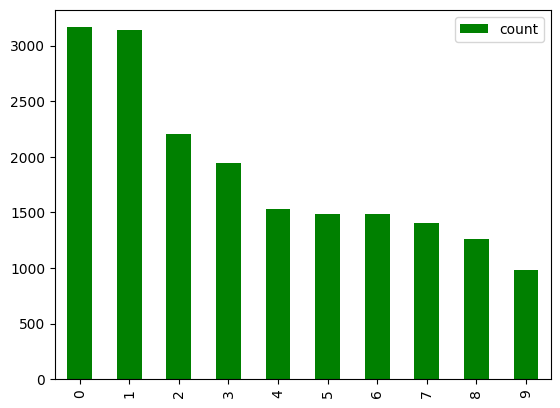

In [16]:
mycolors=['green']
top_neighbourhood.plot(kind='bar',color=mycolors)

In [17]:
#no of active host per location

In [18]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [23]:
active_hosts=df.groupby('neighbourhood_group')['id'].count()
active_hosts

neighbourhood_group
Bronx              875
Brooklyn         16439
Manhattan        16621
Queens            4572
Staten Island      314
Name: id, dtype: int64

<Axes: xlabel='neighbourhood_group'>

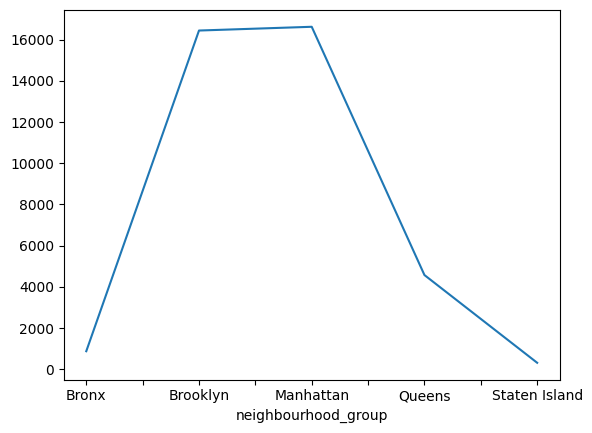

In [24]:
active_hosts.plot(kind='line')

In [25]:
#total counts of each room type

In [29]:
total_rooms=df['room_type'].value_counts()
total_rooms

room_type
Entire home/apt    20321
Private room       17654
Shared room          846
Name: count, dtype: int64

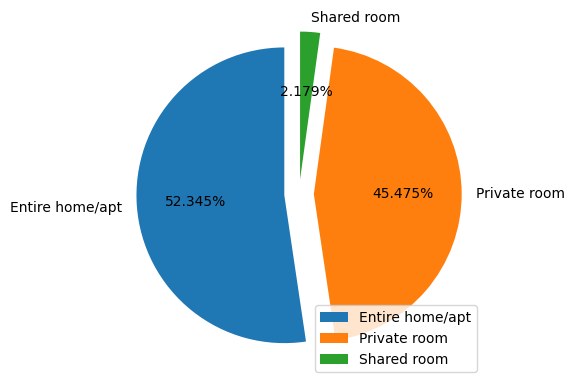

In [42]:
labels=total_rooms.index
plt.pie(total_rooms,labels=labels,autopct='%0.3f%%',startangle=90,explode=[0.1,0.1,0.1])
plt.legend()
plt.show()

In [43]:
#Total Reviews by Each Neighbourhood Group using Pie Chart

In [44]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [45]:
total_reviews=df.groupby('neighbourhood_group')['number_of_reviews'].sum()
total_reviews

neighbourhood_group
Bronx             28334
Brooklyn         486174
Manhattan        454126
Queens           156902
Staten Island     11541
Name: number_of_reviews, dtype: int64

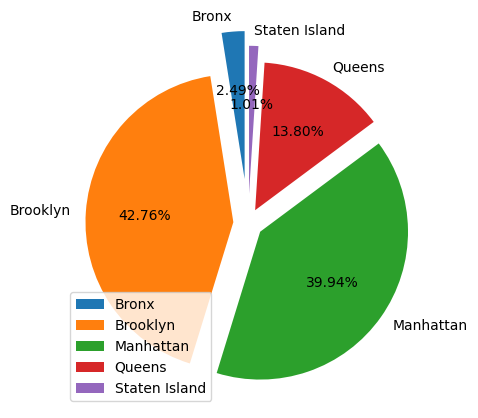

In [58]:
labels=total_reviews.index
explode=[0.3,0.1,0.1,0.1,0.2]
plt.pie(total_reviews,labels=labels,autopct='%0.2f%%',startangle=90,explode=explode)
plt.legend()
plt.show()

In [60]:
#Number of Max. Reviews by Each Neighbourhod Group using Pie Chart

In [61]:
max_reviews=df.groupby('neighbourhood_group')['number_of_reviews'].max()
max_reviews

neighbourhood_group
Bronx            321
Brooklyn         488
Manhattan        607
Queens           629
Staten Island    333
Name: number_of_reviews, dtype: int64

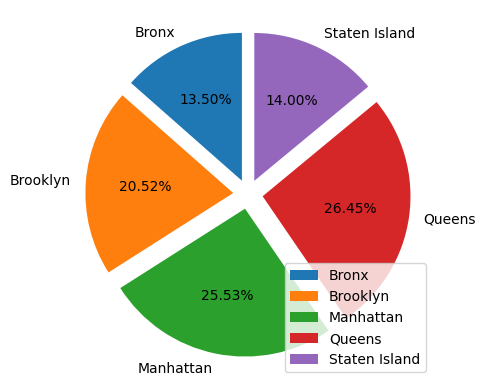

In [75]:
labels=max_reviews.index
explode=[0.1,0.1,0.1,0.1,0.1]
plt.pie(max_reviews,labels=labels,autopct='%0.2f%%',startangle=90,explode=explode)
plt.legend(loc='lower right')
plt.show()

In [83]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [91]:
newdf=df.select_dtypes(include='number')
newdf

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355
3,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0
5,5099,7322,40.74767,-73.97500,200,3,74,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...
48782,36425863,83554966,40.78099,-73.95366,129,1,1,1.00,1,147
48790,36427429,257683179,40.75104,-73.81459,45,1,1,1.00,6,339
48799,36438336,211644523,40.54179,-74.14275,235,1,1,1.00,1,87
48805,36442252,273841667,40.80787,-73.92400,100,1,2,2.00,1,40


In [92]:
newdf.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.591480,-0.010085,0.103336,-0.006696,-0.073937,-0.330019,0.291786,0.098446,0.006624
host_id,0.591480,1.000000,0.012823,0.141276,0.006263,-0.051673,-0.141973,0.296274,0.149417,0.155361
latitude,-0.010085,0.012823,1.000000,0.088259,0.031344,0.024893,-0.008559,-0.010117,0.004340,-0.021921
longitude,0.103336,0.141276,0.088259,1.000000,-0.155298,-0.055414,0.054746,0.146228,-0.093348,0.102573
price,-0.006696,0.006263,0.031344,-0.155298,1.000000,0.025501,-0.035924,-0.030623,0.052895,0.078276
minimum_nights,-0.073937,-0.051673,0.024893,-0.055414,0.025501,1.000000,-0.069366,-0.121712,0.073474,0.101658
number_of_reviews,-0.330019,-0.141973,-0.008559,0.054746,-0.035924,-0.069366,1.000000,0.549699,-0.059796,0.193409
reviews_per_month,0.291786,0.296274,-0.010117,0.146228,-0.030623,-0.121712,0.549699,1.000000,-0.009442,0.185896
calculated_host_listings_count,0.098446,0.149417,0.004340,-0.093348,0.052895,0.073474,-0.059796,-0.009442,1.000000,0.182981
availability_365,0.006624,0.155361,-0.021921,0.102573,0.078276,0.101658,0.193409,0.185896,0.182981,1.000000


<Axes: >

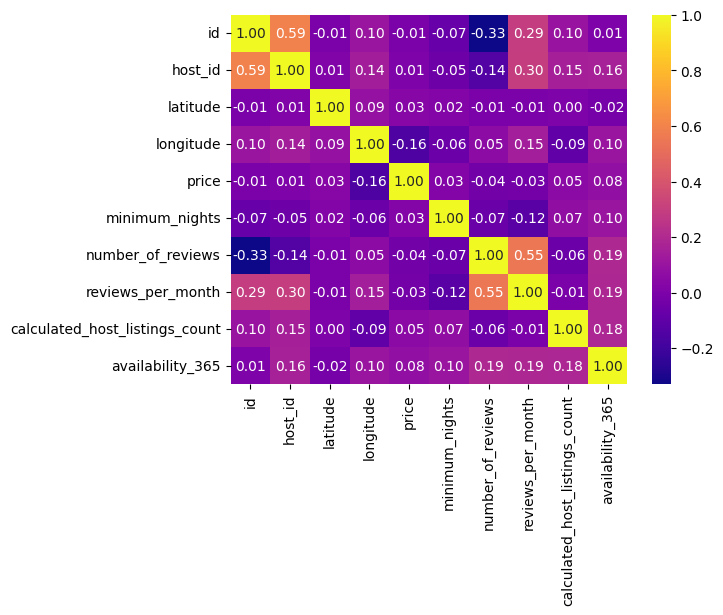

In [93]:
sns.heatmap(newdf.corr(),annot=True,cmap='plasma',fmt='0.2f')

In [94]:
#Pair Plot Visualization

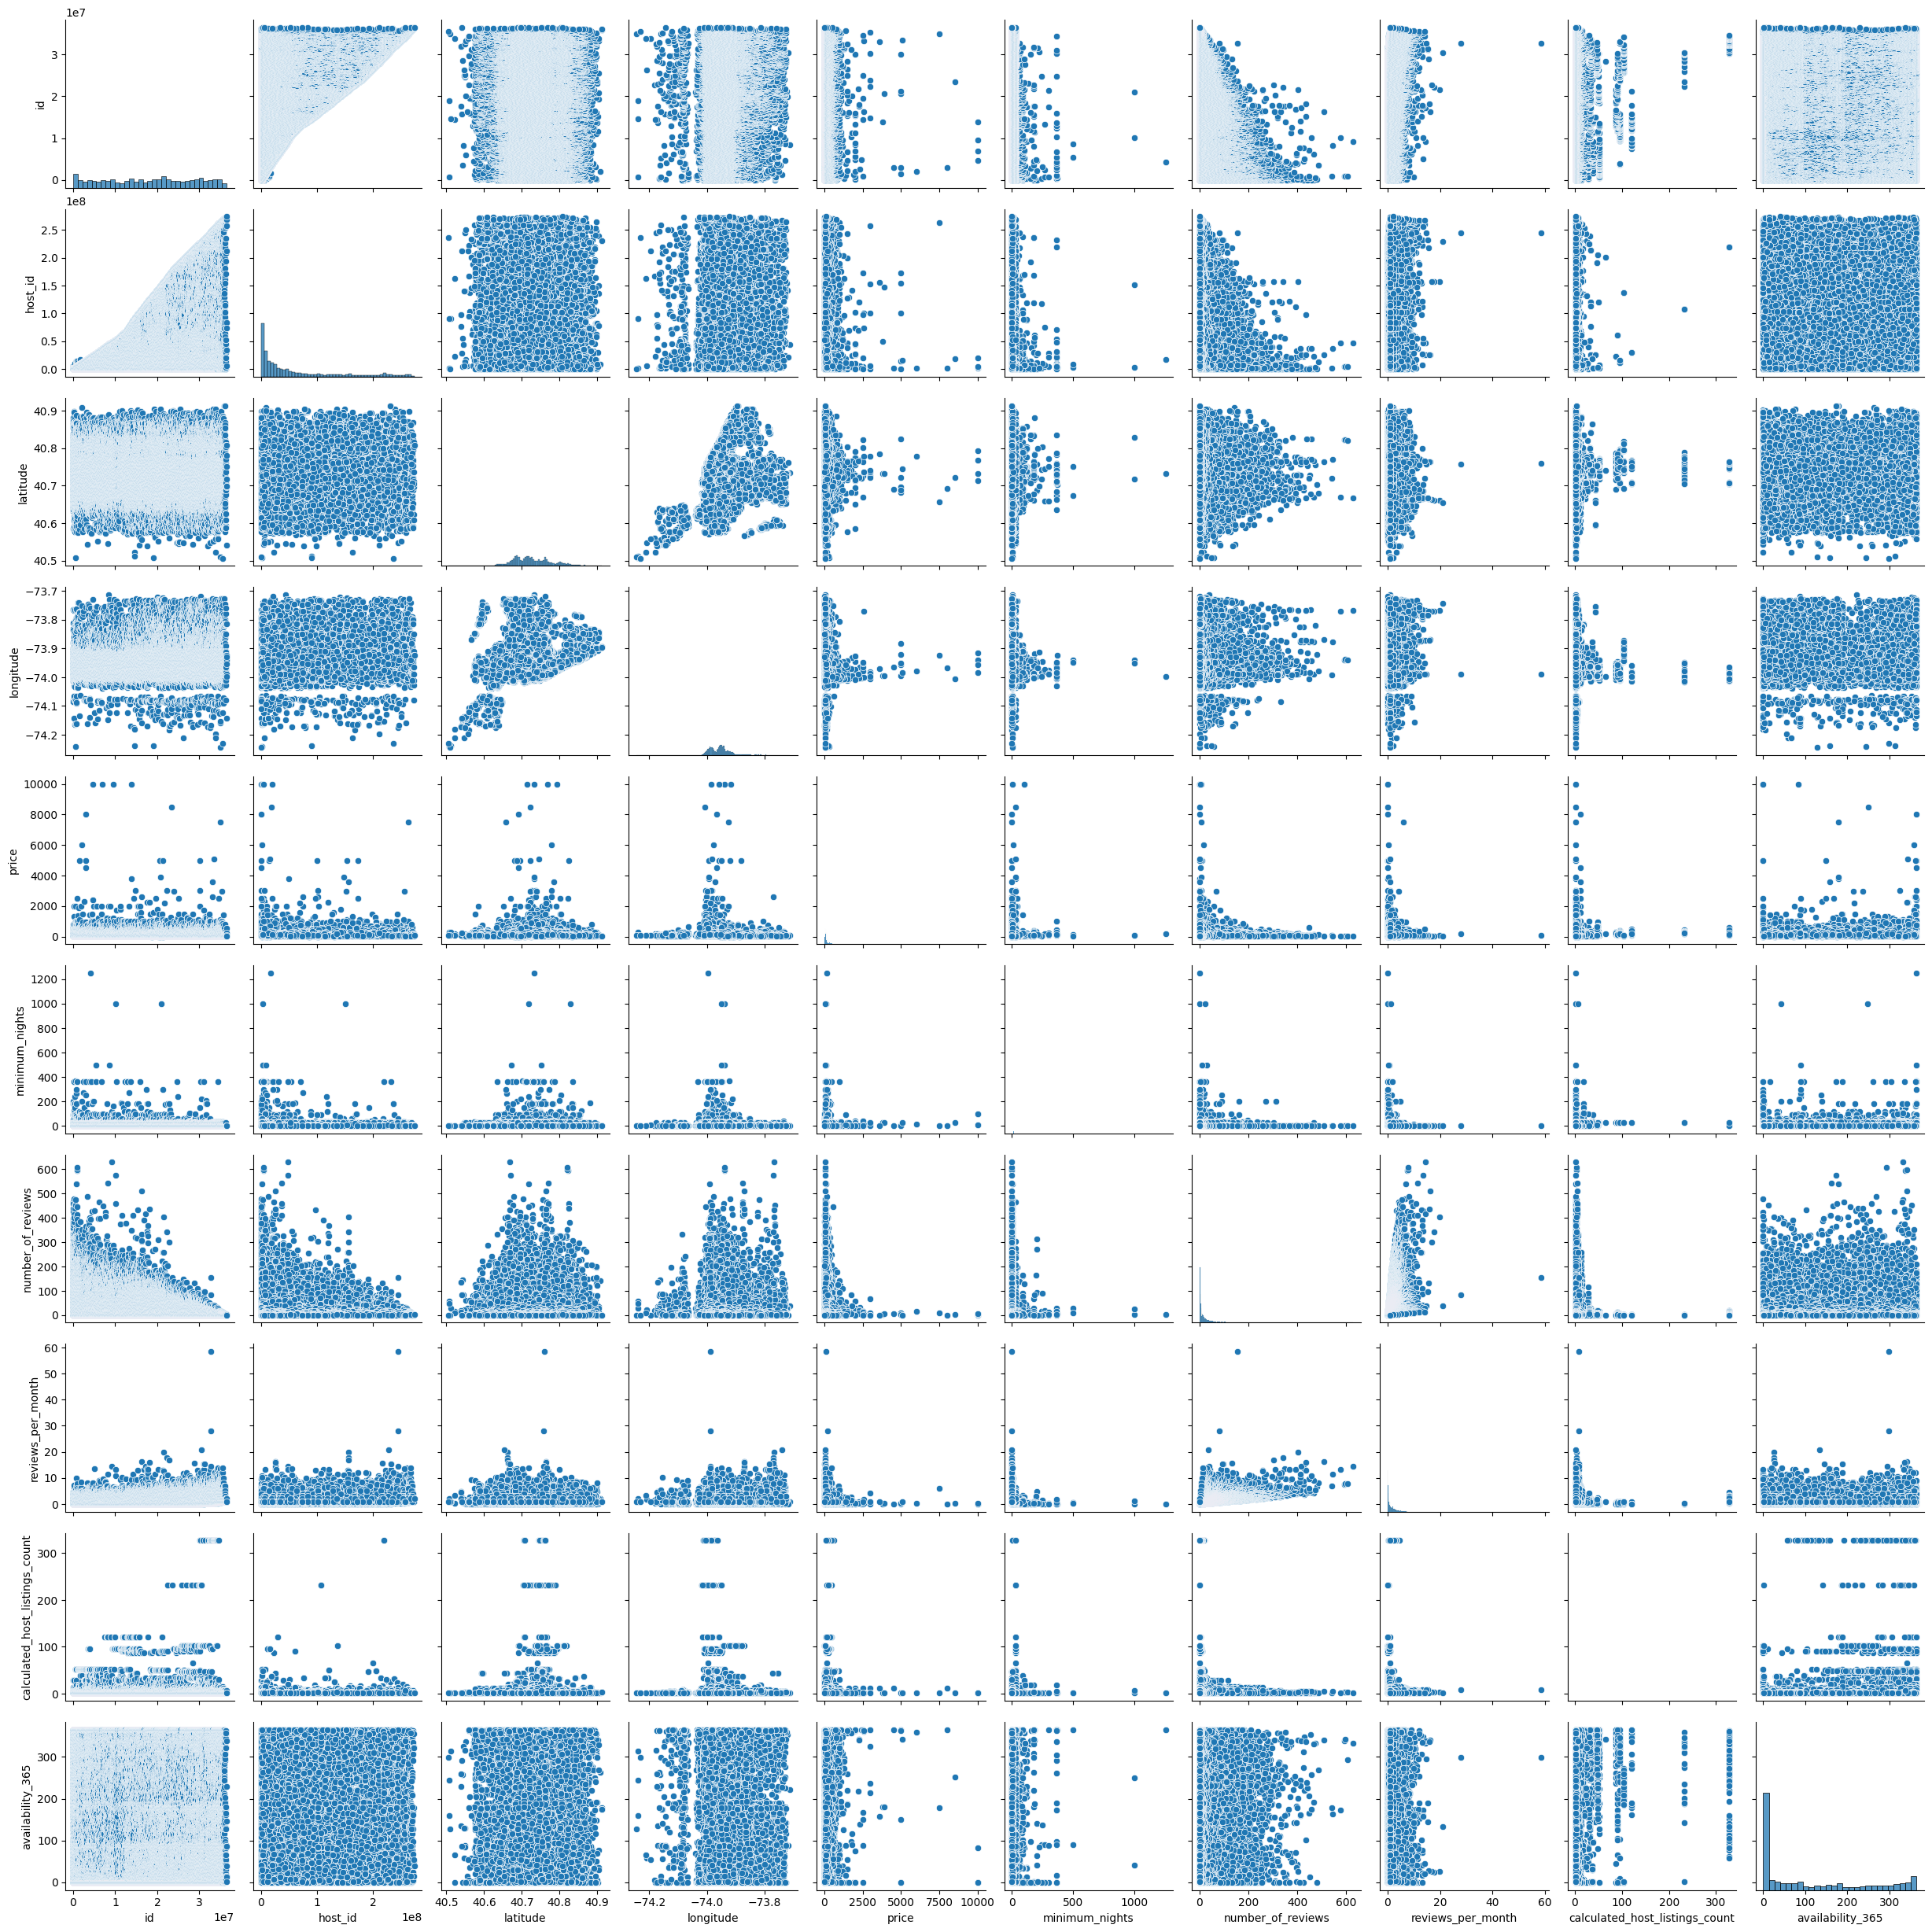

In [96]:
sns.pairplot(newdf)